# Factor Model #

### The Model Specification ###

In [2]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt

# Statistics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import norm

# Handle Files
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))
from data_downloader import get_market_data
from other_data_functions import wexp

In [12]:
# We can download the premiums in the Fama and French website
premiums_df = pd.read_csv(r'..\additional_data\ff_size_n_value.csv')
premiums_df.set_index('date', inplace=True)
premiums_df.index = pd.to_datetime(premiums_df.index)
premiums_df.columns = ['mkt_premium', 'smb_premium', 'hml_premium']

premiums_df

,mkt_premium,smb_premium,hml_premium
date,,,
1999-01-04,-0.0018,0.0014,0.0045
1999-01-05,0.0110,-0.0074,-0.0007
1999-01-06,0.0211,-0.0058,-0.0059
1999-01-07,-0.0007,0.0050,-0.0030
1999-01-08,0.0045,0.0009,0.0027
...,...,...,...
2024-12-24,0.0111,-0.0009,-0.0006
2024-12-26,0.0001,0.0104,-0.0019
2024-12-27,-0.0117,-0.0065,0.0057


In [13]:
# We can download the premiums in the Fama and French website
momemtum_df = pd.read_csv(r'..\additional_data\ff_momentum.csv')
momemtum_df.set_index('date', inplace=True)
momemtum_df.index = pd.to_datetime(momemtum_df.index)
momemtum_df.columns = ['wml_premium']

momemtum_df

,wml_premium
date,
1999-01-04,-0.0153
1999-01-05,-0.0096
1999-01-06,-0.0111
1999-01-07,-0.0073
1999-01-08,-0.0017
...,...
2024-12-24,0.0067
2024-12-26,0.0000
2024-12-27,-0.0085


In [14]:
premiums_df['wml_premium'] = momemtum_df['wml_premium']

premiums_df

,mkt_premium,smb_premium,hml_premium,wml_premium
date,,,,
1999-01-04,-0.0018,0.0014,0.0045,-0.0153
1999-01-05,0.0110,-0.0074,-0.0007,-0.0096
1999-01-06,0.0211,-0.0058,-0.0059,-0.0111
1999-01-07,-0.0007,0.0050,-0.0030,-0.0073
1999-01-08,0.0045,0.0009,0.0027,-0.0017
...,...,...,...,...
2024-12-24,0.0111,-0.0009,-0.0006,0.0067
2024-12-26,0.0001,0.0104,-0.0019,0.0000
2024-12-27,-0.0117,-0.0065,0.0057,-0.0085


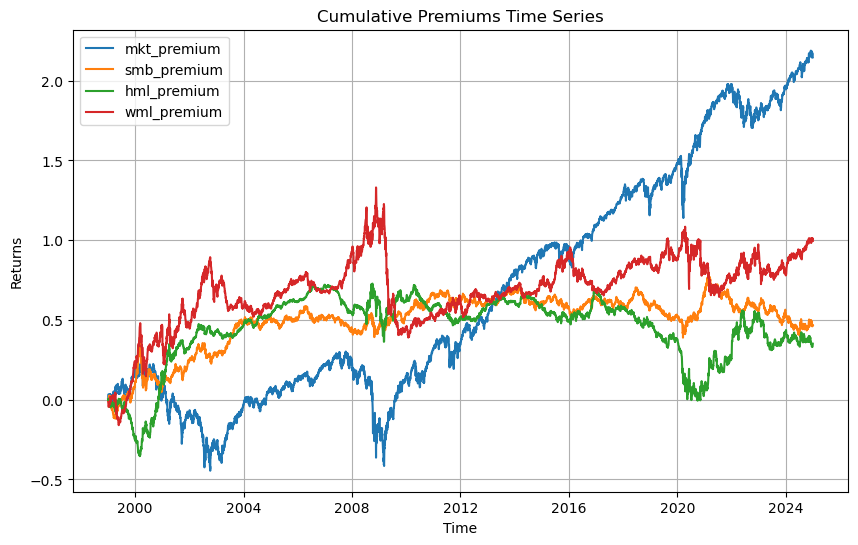

In [15]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(
    premiums_df[['mkt_premium', 'smb_premium', 'hml_premium', 'wml_premium']].cumsum(), 
    label=premiums_df[['mkt_premium', 'smb_premium', 'hml_premium', 'wml_premium']].columns, 
    alpha=1
)

# Config
plt.title('Cumulative Premiums Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show()

In [20]:
# Import risk free rate
rfr = pd.read_csv(r'..\additional_data\risk_free_rate.csv')
rfr.set_index('Date', inplace=True)
rfr.index = pd.to_datetime(rfr.index)

rfr

,risk_free_rate
Date,
1999-01-05,0.000131
1999-01-06,0.000131
1999-01-07,0.000132
1999-01-08,0.000135
1999-01-11,0.000135
...,...
2024-12-24,0.000128
2024-12-26,0.000127
2024-12-27,0.000128


In [26]:
# Get Data from Stock
ticker = 'AAPL'

data_stock = get_market_data(
    ticker=ticker, 
    start_date='2000-01-01', 
    end_date='2025-01-01', 
    returns=True
)

data_stock

Price,close,high,low,open,volume,returns
Date,,,,,,
2000-01-04,0.770139,0.831186,0.760277,0.813341,512377600,-0.088077
2000-01-05,0.781409,0.830716,0.773895,0.779530,778321600,0.014527
2000-01-06,0.713787,0.803949,0.713787,0.797375,767972800,-0.090514
2000-01-07,0.747598,0.758868,0.717544,0.725057,460734400,0.046281
2000-01-10,0.734449,0.768260,0.711908,0.766381,505064000,-0.017744
...,...,...,...,...,...,...
2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700,0.011413
2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100,0.003171
2024-12-27,254.974930,258.077462,252.451019,257.209530,42355300,-0.013331


In [27]:
# Create the regression dataframe
regression_df = pd.DataFrame(index = data_stock.index)

regression_df['stock_premium'] = data_stock['returns'] - rfr['risk_free_rate']
regression_df['mkt_premium'] = premiums_df['mkt_premium']
regression_df['smb_premium'] = premiums_df['smb_premium']
regression_df['hml_premium'] = premiums_df['hml_premium']
regression_df['wml_premium'] = premiums_df['wml_premium']
regression_df.dropna(inplace = True)

regression_df

,stock_premium,mkt_premium,smb_premium,hml_premium,wml_premium
Date,,,,,
2000-01-04,-0.088258,-0.0406,-0.0002,0.0207,-0.0191
2000-01-05,0.014344,-0.0009,0.0031,-0.0005,-0.0049
2000-01-06,-0.090696,-0.0074,-0.0044,0.0124,-0.0149
2000-01-07,0.046100,0.0321,-0.0040,-0.0157,0.0059
2000-01-10,-0.017926,0.0175,0.0087,-0.0135,0.0201
...,...,...,...,...,...
2024-12-24,0.011285,0.0111,-0.0009,-0.0006,0.0067
2024-12-26,0.003043,0.0001,0.0104,-0.0019,0.0000
2024-12-27,-0.013459,-0.0117,-0.0065,0.0057,-0.0085


In [28]:
# Create the Y Vector
y = regression_df['stock_premium']

# Create the X Matrix
x = regression_df.drop('stock_premium', axis = 1)

In [29]:
x.corr()

,mkt_premium,smb_premium,hml_premium,wml_premium
mkt_premium,1.000000,0.150390,0.026749,-0.260426
smb_premium,0.150390,1.000000,-0.089285,0.002543
hml_premium,0.026749,-0.089285,1.000000,-0.320361
wml_premium,-0.260426,0.002543,-0.320361,1.000000


In [30]:
# Calculate Weights
window = len(y)
weights = window * wexp(window, window/2)

# The results of the model
model = sm.WLS(y, sm.add_constant(x), weights=weights, missing='drop').fit()
    
#here we check the summary
print(model.summary())  

                            WLS Regression Results                            
Dep. Variable:          stock_premium   R-squared:                       0.405
Model:                            WLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     1070.
Date:                Tue, 05 Aug 2025   Prob (F-statistic):               0.00
Time:                        16:07:59   Log-Likelihood:                 16408.
No. Observations:                6288   AIC:                        -3.281e+04
Df Residuals:                    6283   BIC:                        -3.277e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0004      0.000      2.015      

In [31]:
# Let us Create a new function
def FamaFrenchFactors(
    stock_returns: pd.Series, 
    market_returns: pd.Series, 
    small_minus_big_series: pd.Series,
    high_minus_low_series: pd.Series,
    winners_minus_lossers_series: pd.Series,
):
    # Create the Arrays    
    X = pd.concat([market_returns, small_minus_big_series, high_minus_low_series, winners_minus_lossers_series], axis=1)
    y = stock_returns

    # Create weights with exponential decay
    T = len(y)
    weights = T * wexp(T, T/2)
    
    # Fit WLS regression
    model = sm.WLS(y, sm.add_constant(X), weights=weights, missing='drop').fit()

    # Avoid KeyError by checking if params exist
    params = model.params
    
    alpha = params.iloc[0]
    capm_beta = params.iloc[1]
    smb_beta = params.iloc[2]
    hml_beta = params.iloc[3]
    wml_beta = params.iloc[4]
            
    parameters = {
        'alpha':alpha,
        'mkt_beta':capm_beta,
        'smb_beta':smb_beta,
        'hml_beta':hml_beta,
        'wml_beta': wml_beta
    }
    
    return parameters

In [32]:
# Check if the Function Works
parameters = FamaFrenchFactors(
    regression_df['stock_premium'],
    regression_df['mkt_premium'],
    regression_df['smb_premium'],
    regression_df['hml_premium'],
    regression_df['wml_premium'],
)

parameters

{'alpha': 0.00043534583946515273,
 'mkt_beta': 1.1482555753724386,
 'smb_beta': -0.1526359730605055,
 'hml_beta': -0.4504386079763376,
 'wml_beta': 0.03010727768280702}

### Getting the Coefficients for all the Stocks ###

In [34]:
# Dictionary to store the DataFrames
returns_df = pd.read_csv(r'..\additional_data\stocks_returns.csv')
returns_df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
returns_df.set_index('Date', inplace=True)
returns_df.index = pd.to_datetime(returns_df.index)

returns_df

,A,AAL,AAP,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,...,XEL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-05,NaN,NaN,NaN,0.048789,NaN,NaN,0.001281,-0.039193,NaN,-0.021506,...,0.002275,-0.008643,0.009709,0.018928,NaN,0.019293,NaN,0.016878,-0.003114,NaN
1999-01-06,NaN,NaN,NaN,-0.036742,NaN,NaN,-0.007712,0.000000,NaN,-0.036462,...,0.004535,0.039154,0.009615,0.019087,NaN,0.015170,NaN,0.002090,0.001039,NaN
1999-01-07,NaN,NaN,NaN,0.074963,NaN,NaN,-0.012987,-0.005831,NaN,0.020998,...,-0.004535,-0.001670,-0.002395,-0.004610,NaN,-0.005031,NaN,0.022705,-0.007295,NaN
1999-01-08,NaN,NaN,NaN,0.000000,NaN,NaN,-0.003929,-0.005865,NaN,0.014185,...,-0.006841,-0.005870,-0.012063,-0.004631,NaN,0.002519,NaN,0.104544,0.002090,NaN
1999-01-11,NaN,NaN,NaN,0.019256,NaN,NaN,-0.013211,-0.048202,NaN,0.003834,...,-0.023150,-0.042085,-0.032062,0.014337,NaN,0.026073,NaN,-0.045120,-0.027515,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.011082,0.005780,-0.000457,0.011413,0.008985,0.003488,0.003929,0.006278,0.007940,0.002683,...,0.007210,0.000940,-0.002642,-0.023556,0.005432,0.008480,0.004484,0.012187,0.010791,0.002553
2024-12-26,-0.001986,0.000000,0.011595,0.003171,-0.004454,0.002442,0.004434,0.002802,-0.003324,0.004944,...,-0.000440,0.000845,0.013663,-0.006522,0.002705,0.007380,-0.000466,0.003559,0.006889,0.004966
2024-12-27,-0.002137,0.000000,-0.004077,-0.013331,-0.006663,-0.014403,-0.002432,-0.006369,-0.011862,-0.008208,...,-0.000587,-0.000094,-0.003163,-0.002183,-0.007966,-0.005678,-0.003549,-0.019799,-0.012179,-0.005574


In [36]:
# Calculate the Coefficients
tickers = []
betas_capm = []
betas_smb = []
betas_hml = []
betas_wml = []

# Create the Loop
for ticker in returns_df.columns:
    stock_excess_returns = (returns_df[ticker] - rfr['risk_free_rate']).dropna()
    time_index = stock_excess_returns.index

    # Calculations
    parameters = FamaFrenchFactors(
        stock_excess_returns,
        premiums_df['mkt_premium'].loc[time_index],
        premiums_df['smb_premium'].loc[time_index],
        premiums_df['hml_premium'].loc[time_index],
        premiums_df['wml_premium'].loc[time_index],
    )

    tickers.append(ticker)
    betas_capm.append(parameters['mkt_beta'])
    betas_smb.append(parameters['smb_beta'])
    betas_hml.append(parameters['hml_beta'])
    betas_wml.append(parameters['wml_beta'])

    print(f'{ticker} is ready.')

A is ready.
AAL is ready.
AAP is ready.
AAPL is ready.
ABBV is ready.
ABNB is ready.
ABT is ready.
ACGL is ready.
ACN is ready.
ADBE is ready.
ADI is ready.
ADM is ready.
ADP is ready.
ADSK is ready.
AEE is ready.
AEP is ready.
AES is ready.
AFL is ready.
AIG is ready.
AIT is ready.
AIV is ready.
AIZ is ready.
AJG is ready.
AKAM is ready.
ALB is ready.
ALGN is ready.
ALK is ready.
ALL is ready.
ALLE is ready.
AMAT is ready.
AMCR is ready.
AMD is ready.
AME is ready.
AMG is ready.
AMGN is ready.
AMT is ready.
AMZN is ready.
AN is ready.
ANET is ready.
ANF is ready.
ANSS is ready.
AON is ready.
AOS is ready.
APA is ready.
APD is ready.
APH is ready.
APO is ready.
APTV is ready.
ARE is ready.
ASH is ready.
ATGE is ready.
ATO is ready.
AVB is ready.
AVGO is ready.
AVY is ready.
AWK is ready.
AXON is ready.
AXP is ready.
AYI is ready.
AZO is ready.
BA is ready.
BAC is ready.
BALL is ready.
BAX is ready.
BBWI is ready.
BBY is ready.
BC is ready.
BDX is ready.
BEN is ready.
BG is ready.
BHF i

In [37]:
# Create the DataFrame
ff_betas_df = pd.DataFrame(
    {
        'mkt_beta': betas_capm,
        'smb_beta': betas_smb,
        'hml_beta': betas_hml,
        'wml_beta': betas_wml
    }, index = tickers,
)

ff_betas_df

,mkt_beta,smb_beta,hml_beta,wml_beta
A,1.128971,0.207682,-0.257203,-0.099570
AAL,1.325925,0.726714,0.761726,-0.440680
AAP,0.795798,0.324448,0.220186,-0.050758
AAPL,1.150409,-0.149558,-0.453476,0.034337
ABBV,0.653552,-0.264476,0.110161,0.068886
...,...,...,...,...
YUM,0.782385,-0.074496,0.143775,0.038774
ZBH,0.767193,0.112810,0.098739,-0.097623
ZBRA,1.069888,0.527373,-0.183733,-0.124856
ZION,1.195849,0.409108,1.476960,-0.315789


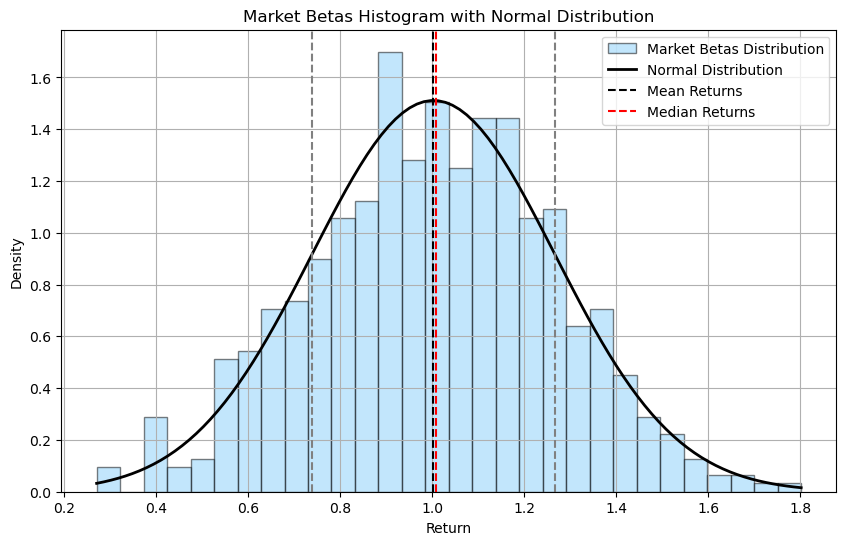

In [38]:
# Calculate Mean and Standard Deviation
mu = ff_betas_df['mkt_beta'].mean()
sigma = ff_betas_df['mkt_beta'].std()
median = ff_betas_df['mkt_beta'].median()

# Create Histogram
plt.figure(figsize=(10, 6))
plt.hist(ff_betas_df['mkt_beta'], bins=30, density=True, color='lightskyblue', alpha=0.5, edgecolor='black', label='Market Betas Distribution')

# Generate the Values of the Normal Distribution
x = np.linspace(ff_betas_df['mkt_beta'].min(), ff_betas_df['mkt_beta'].max(), 100)
y = norm.pdf(x, mu, sigma)

# Graph the Real Normal Distribution
plt.plot(x, y, color='black', linestyle='solid', linewidth=2, label='Normal Distribution')

# Reference Lines
plt.axvline(x=mu, color='black', linestyle='dashed', label='Mean Returns')
plt.axvline(x=median, color='red', linestyle='dashed', label='Median Returns')
plt.axvline(x=mu + sigma, color='grey', linestyle='dashed')
plt.axvline(x=mu - sigma, color='grey', linestyle='dashed')

# Config
plt.title('Market Betas Histogram with Normal Distribution')
plt.xlabel('Return')
plt.ylabel('Density')

# Legends and Grid
plt.legend()
plt.grid(True)

# Show
plt.show()

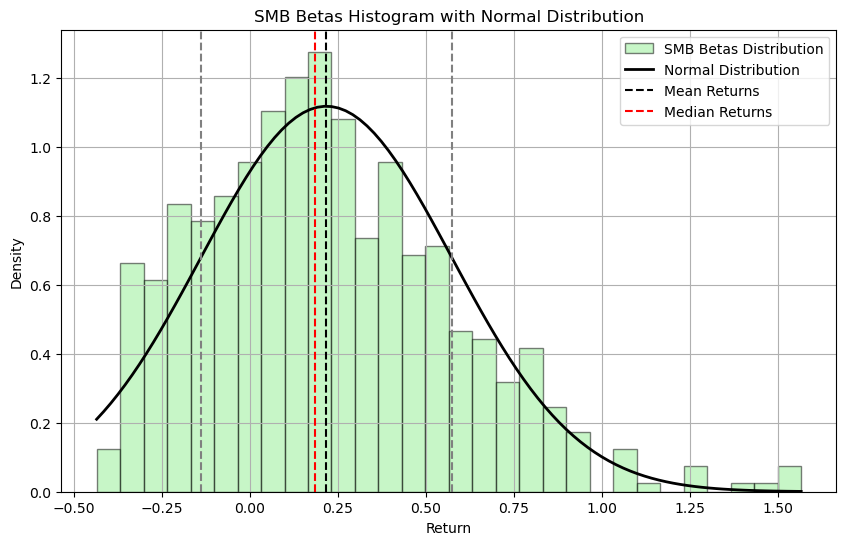

In [39]:
# Calculate Mean and Standard Deviation
mu = ff_betas_df['smb_beta'].mean()
sigma = ff_betas_df['smb_beta'].std()
median = ff_betas_df['smb_beta'].median()

# Create Histogram
plt.figure(figsize=(10, 6))
plt.hist(ff_betas_df['smb_beta'], bins=30, density=True, color='lightgreen', alpha=0.5, edgecolor='black', label='SMB Betas Distribution')

# Generate the Values of the Normal Distribution
x = np.linspace(ff_betas_df['smb_beta'].min(), ff_betas_df['smb_beta'].max(), 100)
y = norm.pdf(x, mu, sigma)

# Graph the Real Normal Distribution
plt.plot(x, y, color='black', linestyle='solid', linewidth=2, label='Normal Distribution')

# Reference Lines
plt.axvline(x=mu, color='black', linestyle='dashed', label='Mean Returns')
plt.axvline(x=median, color='red', linestyle='dashed', label='Median Returns')
plt.axvline(x=mu + sigma, color='grey', linestyle='dashed')
plt.axvline(x=mu - sigma, color='grey', linestyle='dashed')

# Config
plt.title('SMB Betas Histogram with Normal Distribution')
plt.xlabel('Return')
plt.ylabel('Density')

# Legends and Grid
plt.legend()
plt.grid(True)

# Show
plt.show()

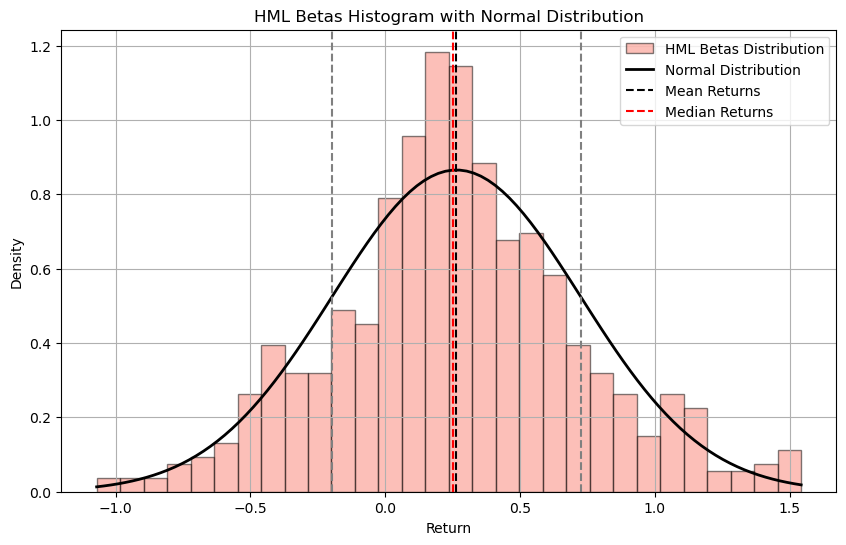

In [40]:
# Calculate Mean and Standard Deviation
mu = ff_betas_df['hml_beta'].mean()
sigma = ff_betas_df['hml_beta'].std()
median = ff_betas_df['hml_beta'].median()

# Create Histogram
plt.figure(figsize=(10, 6))
plt.hist(ff_betas_df['hml_beta'], bins=30, density=True, color='salmon', alpha=0.5, edgecolor='black', label='HML Betas Distribution')

# Generate the Values of the Normal Distribution
x = np.linspace(ff_betas_df['hml_beta'].min(), ff_betas_df['hml_beta'].max(), 100)
y = norm.pdf(x, mu, sigma)

# Graph the Real Normal Distribution
plt.plot(x, y, color='black', linestyle='solid', linewidth=2, label='Normal Distribution')

# Reference Lines
plt.axvline(x=mu, color='black', linestyle='dashed', label='Mean Returns')
plt.axvline(x=median, color='red', linestyle='dashed', label='Median Returns')
plt.axvline(x=mu + sigma, color='grey', linestyle='dashed')
plt.axvline(x=mu - sigma, color='grey', linestyle='dashed')

# Config
plt.title('HML Betas Histogram with Normal Distribution')
plt.xlabel('Return')
plt.ylabel('Density')

# Legends and Grid
plt.legend()
plt.grid(True)

# Show
plt.show()

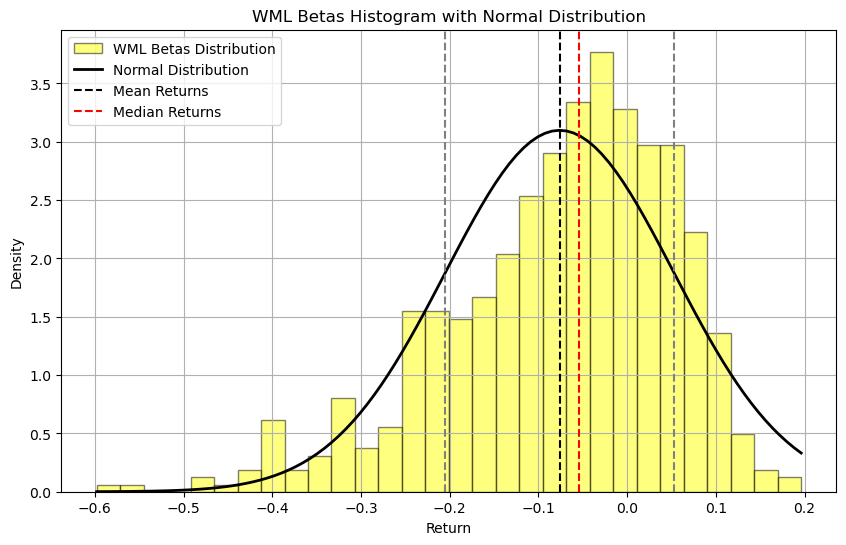

In [41]:
# Calculate Mean and Standard Deviation
mu = ff_betas_df['wml_beta'].mean()
sigma = ff_betas_df['wml_beta'].std()
median = ff_betas_df['wml_beta'].median()

# Create Histogram
plt.figure(figsize=(10, 6))
plt.hist(ff_betas_df['wml_beta'], bins=30, density=True, color='yellow', alpha=0.5, edgecolor='black', label='WML Betas Distribution')

# Generate the Values of the Normal Distribution
x = np.linspace(ff_betas_df['wml_beta'].min(), ff_betas_df['wml_beta'].max(), 100)
y = norm.pdf(x, mu, sigma)

# Graph the Real Normal Distribution
plt.plot(x, y, color='black', linestyle='solid', linewidth=2, label='Normal Distribution')

# Reference Lines
plt.axvline(x=mu, color='black', linestyle='dashed', label='Mean Returns')
plt.axvline(x=median, color='red', linestyle='dashed', label='Median Returns')
plt.axvline(x=mu + sigma, color='grey', linestyle='dashed')
plt.axvline(x=mu - sigma, color='grey', linestyle='dashed')

# Config
plt.title('WML Betas Histogram with Normal Distribution')
plt.xlabel('Return')
plt.ylabel('Density')

# Legends and Grid
plt.legend()
plt.grid(True)

# Show
plt.show()

In [42]:
# Calculate the VIF
# Concat
X = pd.concat([
    regression_df['mkt_premium'],
    regression_df['smb_premium'],
    regression_df['hml_premium'],
    regression_df['wml_premium']
], axis=1, join='inner')


X.dropna(inplace = True)

X.columns = ['mkt', 'smb', 'hml', 'wml']

X

,mkt,smb,hml,wml
Date,,,,
2000-01-04,-0.0406,-0.0002,0.0207,-0.0191
2000-01-05,-0.0009,0.0031,-0.0005,-0.0049
2000-01-06,-0.0074,-0.0044,0.0124,-0.0149
2000-01-07,0.0321,-0.0040,-0.0157,0.0059
2000-01-10,0.0175,0.0087,-0.0135,0.0201
...,...,...,...,...
2024-12-24,0.0111,-0.0009,-0.0006,0.0067
2024-12-26,0.0001,0.0104,-0.0019,0.0000
2024-12-27,-0.0117,-0.0065,0.0057,-0.0085


In [43]:
vif_data = pd.DataFrame()
vif_data['vars'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,vars,VIF
0,mkt,1.102002
1,smb,1.032584
2,hml,1.126548
3,wml,1.198919


In [44]:
r_squared_df = pd.DataFrame()
r_squared_df['vars'] = X.columns

r_squared_df['r_squared'] = 1 - (1 / vif_data['VIF'])

r_squared_df

,vars,r_squared
0,mkt,0.092560
1,smb,0.031556
2,hml,0.112333
3,wml,0.165915


In [45]:
ff_betas_df.to_csv(r"..\additional_data\ff_coefficients.csv")